In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
N = 100

x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 1, N)
x3 = np.random.normal(0, 1, N)
x4 = np.random.normal(0, 1, N)

X = np.c_[x1, x2, x3, x4]
y = 1 / 2 * x1 + 3 / 4 * x2 + 1 * x3 + 0.1 * x4 + np.random.normal(0, 0.5, N)

In [3]:
def train_test_split_add_noise(X, y, N=1):

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.9,
                                                        random_state=42)

    if N > X.shape[1]:

        to_add = np.random.choice(X.shape[1], N - X.shape[1])

        X_train_add = np.c_[
            X_train, X_train[:, to_add] +
            np.random.normal(0, 0.1, size=(X_train.shape[0], N - X.shape[1]))]
        X_test_add = np.c_[
            X_test, X_test[:, to_add] +
            np.random.normal(0, 0.1, size=(X_test.shape[0], N - X.shape[1]))]

    elif N < X.shape[1]:

        to_use = np.random.choice(X.shape[1], N, replace=False)

        X_train_add = X_train[:, to_use]
        X_test_add = X_test[:, to_use]

    else:
        X_train_add = X_train
        X_test_add = X_test

    return X_train_add, X_test_add, y_train, y_test

In [4]:
N_lst = np.arange(1, 30, 1)
mse_lst = []

K = 1000

for N in N_lst:

    this_mse_lst = []
    for _ in range(K):
        X_train, X_test, y_train, y_test = train_test_split_add_noise(X,
                                                                      y,
                                                                      N=N)
        this_mse_lst.append(
            mean_squared_error(
                y_test,
                LinearRegression(fit_intercept=False).fit(
                    X_train, y_train).predict(X_test)))
    mse_lst.append(np.median(this_mse_lst))

Text(0, 0.5, 'Test MSE')

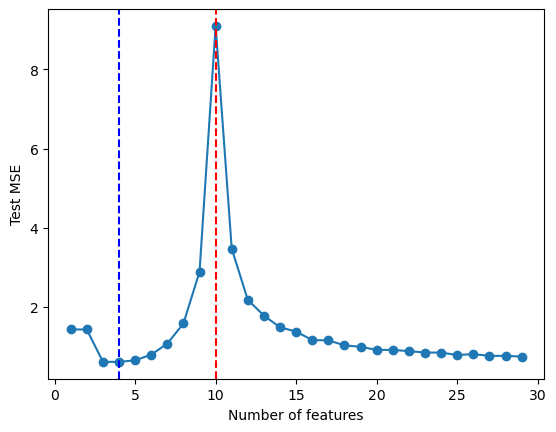

In [7]:
plt.plot(N_lst, mse_lst, '-o')
plt.axvline(x=4, color='blue', linestyle='--')
plt.axvline(x=10, color='r', linestyle='--')
plt.xlabel('Number of features')
plt.ylabel('Test MSE')